In [50]:

import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [51]:
from google.colab import files
uploaded=files.upload()

Saving forestfires (1).csv to forestfires (1) (1).csv


In [52]:
data=pd.read_csv('forestfires (1).csv')

In [53]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [54]:
data.shape

(517, 31)

In [55]:
data.drop(data.columns[[11,12,13,14,15,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1, inplace=True)

In [56]:
data.head()
#size_category is the burned are of the forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [57]:
#let us do the label encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
data[['month'	,'day' ,'size_category']]= data[['month'	,'day' ,'size_category']].apply(LabelEncoder().fit_transform)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [58]:
data.size_category.value_counts()   #1 - small, 0- large

1    378
0    139
Name: size_category, dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [60]:
data.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [61]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,1,6,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,1
100,1,3,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,1
215,7,2,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0
303,6,0,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1
426,1,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,1
461,1,2,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,1
501,1,5,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,1
508,1,0,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1


In [62]:
#let us drop the duplicate values
data=data.drop_duplicates()

In [63]:
data.duplicated().sum()
#we have removed all the duplicate values

0

In [64]:
data.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.149053,-0.003122,-0.161662,0.231234,-0.172492,-0.069237,-0.097232,-0.140640,-0.072934,0.028569,-0.024288
day,-0.149053,1.000000,0.073244,0.068438,0.053815,0.113982,0.151230,-0.109650,-0.035736,0.047466,0.019449,-0.005360
FFMC,-0.003122,0.073244,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,-0.024292
DMC,-0.161662,0.068438,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.046598
DC,0.231234,0.053815,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.028372
ISI,-0.172492,0.113982,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.007867
temp,-0.069237,0.151230,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.009976
RH,-0.097232,-0.109650,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.039730
wind,-0.140640,-0.035736,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,-0.059513
rain,-0.072934,0.047466,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.053463


<Axes: >

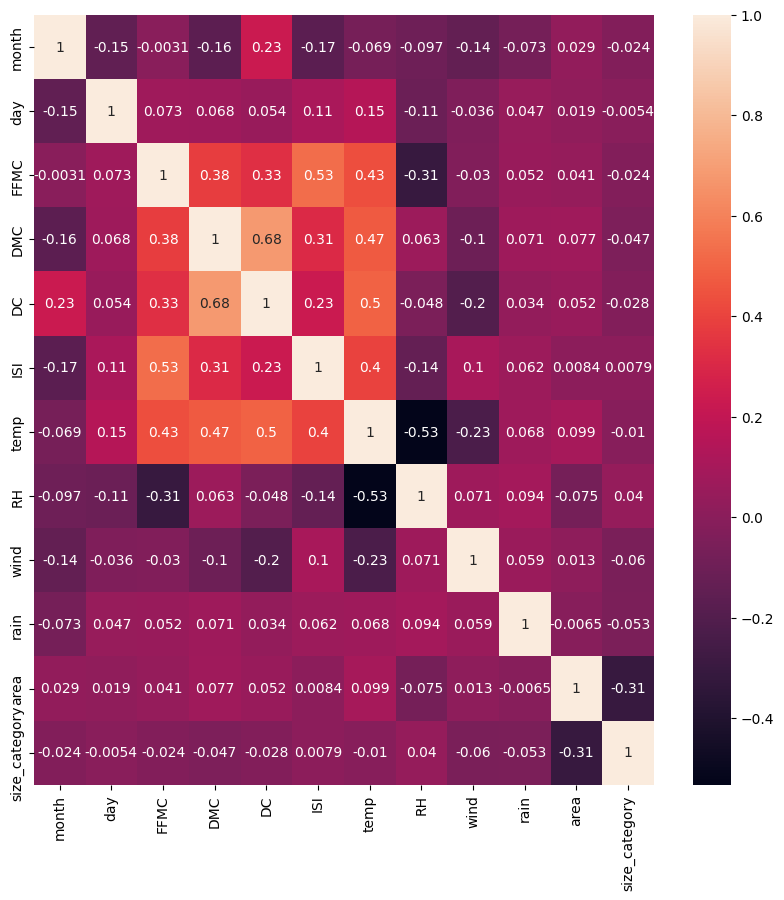

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [66]:
# in the above heat map we can observe ther is multicolinearity
#the depedency of all the columns on size_category is very less
#ISI is 53% dependent on FFMC
# temp is 43% dependent on FFMC and 47% dependent on DMC
# if we check the dependency between size_category and all other components it is very less.


In [67]:
#let us standardize our data and check
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data)

In [68]:
scaled_data.columns=['month',	'day',	'FFMC',	'DMC'	,'DC',	'ISI'	,'temp',	'RH',	'wind',	'rain'	,'area',	'size_category']

In [69]:
scaled_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.271858,-1.424495,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,0.609892
1,0.958019,1.178046,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,0.609892
2,0.958019,-0.383478,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,0.609892
3,0.271858,-1.424495,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,0.609892
4,0.271858,0.137030,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,0.609892


<Axes: >

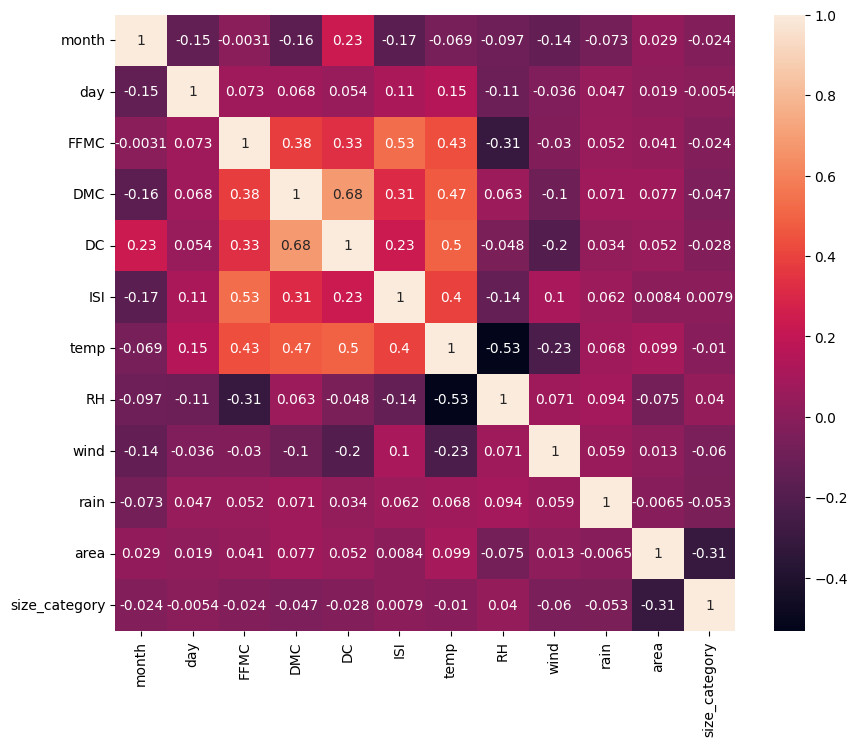

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(scaled_data.corr(), annot=True)

In [71]:
#we can observe there, there is still multi-colinearity

In [72]:
#let us check the VIF:


In [73]:
data.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1


In [74]:
import statsmodels.formula.api as smf
rsq_month=smf.ols('month~day+FFMC+DMC+DC+ISI+temp+RH+wind+rain+area', data=data).fit().rsquared
vif_month=1/(1-rsq_month)
rsq_day=smf.ols('day~month+FFMC+DMC+DC+ISI+temp+RH+wind+rain+area', data=data).fit().rsquared
vif_day=1/(1-rsq_day)
rsq_FFMC=smf.ols('FFMC~day+month+DMC+DC+ISI+temp+RH+wind+rain+area', data=data).fit().rsquared
vif_FFMC=1/(1-rsq_FFMC)
rsq_DMC=smf.ols('DMC~day+FFMC+month+DC+ISI+temp+RH+wind+rain+area', data=data).fit().rsquared
vif_DMC=1/(1-rsq_DMC)
rsq_DC=smf.ols('DC~day+FFMC+DMC+month+ISI+temp+RH+wind+rain+area', data=data).fit().rsquared
vif_DC=1/(1-rsq_DC)
rsq_ISI=smf.ols('ISI~day+FFMC+DMC+DC+month+temp+RH+wind+rain+area', data=data).fit().rsquared
vif_ISI=1/(1-rsq_ISI)
rsq_temp=smf.ols('temp~day+FFMC+DMC+DC+ISI+month+RH+wind+rain+area', data=data).fit().rsquared
vif_temp=1/(1-rsq_temp)
rsq_RH=smf.ols('RH~day+FFMC+DMC+DC+ISI+temp+month+wind+rain+area', data=data).fit().rsquared
vif_RH=1/(1-rsq_RH)
rsq_wind=smf.ols('wind~day+FFMC+DMC+DC+ISI+temp+RH+month+rain+area', data=data).fit().rsquared
vif_wind=1/(1-rsq_wind)
rsq_rain=smf.ols('rain~day+FFMC+DMC+DC+ISI+temp+RH+wind+month+area', data=data).fit().rsquared
vif_rain=1/(1-rsq_rain)
rsq_area=smf.ols('area~day+FFMC+DMC+DC+ISI+temp+RH+wind+rain+month', data=data).fit().rsquared
vif_area=1/(1-rsq_area)

In [75]:
d1={'Variables':['month',	'day',	'FFMC',	'DMC'	,'DC',	'ISI'	,'temp',	'RH',	'wind',	'rain'	,'area'], 'VF':[vif_month,vif_day,vif_FFMC,vif_DMC,vif_DC, vif_ISI,vif_temp,vif_RH,vif_wind,vif_rain, vif_area]}

In [76]:
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VF
0,month,1.470577
1,day,1.056485
2,FFMC,1.709124
3,DMC,2.672435
4,DC,2.724059
5,ISI,1.613178
6,temp,2.770964
7,RH,1.939219
8,wind,1.154966
9,rain,1.043971


In [77]:
#let us take the cut-off for VIF as 10
#all values are below 10, hence we can tell the variable are not co-related
#multicollinearity is not as much of a problem in neural networks. In neural networks, the weights of the model are adjusted using a technique called backpropagation.

In [78]:
#let us split our data into X and Y:
X=scaled_data.iloc[:, 0:11]
Y=data.iloc[:,11]

In [79]:
Y.value_counts()

1    371
0    138
Name: size_category, dtype: int64

BUILD THE MODEL:

In [80]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

Tuning of Hyperparameters :- Batch Size and Epochs

In [81]:
def create_model():
  model=Sequential(name='Hyperparameter-tuning')
  model.add(Dense(13, input_dim=11, kernel_initializer='uniform', activation='relu'))    #i/p layers we are giving 11 and for 1st hidden layer we are giving no.of layers as 13
  model.add(Dense(10,  kernel_initializer='uniform', activation='relu' ))
  model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid' ))     #o/p layer

  adam=Adam(learning_rate=0.01)           #we are adding our optimizer as Adam
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [82]:
#we are creating only 2 hidden layers, 1 i/p and 1 o/p layer
#Dense is no.of neurons in each hidden layer
#In thi we will tune batch size and epochs hence, we should give all other hyperparameters except this.

In [83]:
#create model
model= KerasClassifier(build_fn=create_model, verbose=0)
batch_size=[10,20,40]    #we want to tune batch_size and epochs
epochs=[10,50,100]
# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size, epochs=epochs)
#grid search
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=10)


In [84]:
grid.fit(X,Y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START batch_size=10, epochs=10...................................
[CV 1/10; 1/9] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.0s
[CV 2/10; 1/9] START batch_size=10, epochs=10...................................
[CV 2/10; 1/9] END ....batch_size=10, epochs=10;, score=1.000 total time=   1.9s
[CV 3/10; 1/9] START batch_size=10, epochs=10...................................
[CV 3/10; 1/9] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.4s
[CV 4/10; 1/9] START batch_size=10, epochs=10...................................
[CV 4/10; 1/9] END ....batch_size=10, epochs=10;, score=0.529 total time=   2.7s
[CV 5/10; 1/9] START batch_size=10, epochs=10...................................
[CV 5/10; 1/9] END ....batch_size=10, epochs=10;, score=0.569 total time=   1.9s
[CV 6/10; 1/9] START batch_size=10, epochs=10...................................
[CV 6/10; 1/9] END ....batch_size=10, epochs=10;

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9191d130d0>,
             param_grid={'batch_size': [10, 20, 40], 'epochs': [10, 50, 100]},
             verbose=10)

In [85]:
grid.best_params_, grid.best_score_
#batchsize is 10, epochs are 50

({'batch_size': 10, 'epochs': 50}, 0.9841960787773132)

Hyperparameter Tuning for Learning rate and drop out rate

In [86]:
from keras.layers import Dropout

In [87]:
#defining the model
def create_model(learning_rate, dropout_rate):
  model=Sequential()
  model.add(Dense(13, input_dim=11, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,  kernel_initializer='uniform', activation='relu' ))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid' ))

  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [88]:
#create a model
model=KerasClassifier(build_fn=create_model, verbose = 0, batch_size = 10,epochs = 50)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate, dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv =10, verbose = 10)



In [89]:
result=grid.fit(X,Y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/10; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   6.5s
[CV 2/10; 1/9] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/10; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   4.7s
[CV 3/10; 1/9] START dropout_rate=0.0, learning_rate=0.001......................
[CV 3/10; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   6.0s
[CV 4/10; 1/9] START dropout_rate=0.0, learning_rate=0.001......................
[CV 4/10; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.980 total time=   6.0s
[CV 5/10; 1/9] START dropout_rate=0.0, learning_rate=0.001......................
[CV 5/10; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   6.0s
[CV 6/10; 1/9] START dropout_rate=0.0, learning_rate=0.001......................
[CV

In [90]:
grid.best_params_, grid.best_score_
#dropout rate - 0.0, learning rate= 0.001
#batchsize is 10, epochs are 50

({'dropout_rate': 0.0, 'learning_rate': 0.001}, 0.9783137261867523)

Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [91]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(13,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [92]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = 10,verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START activation_function=softmax, init=uniform.................
[CV 1/10; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.8s
[CV 2/10; 1/12] START activation_function=softmax, init=uniform.................
[CV 2/10; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   6.2s
[CV 3/10; 1/12] START activation_function=softmax, init=uniform.................
[CV 3/10; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   6.0s
[CV 4/10; 1/12] START activation_function=softmax, init=uniform.................
[CV 4/10; 1/12] END activation_function=softmax, init=uniform;, score=0.529 total time=   6.0s
[CV 5/10; 1/12] START activation_function=softmax, init=uniform.................
[CV 5/10; 1/12] END activation_function=softmax, init=uniform;, score=0.314 total time=   6.0s
[CV 6/10; 1/12] START activation_function=softmax, init=u

In [93]:
grid.best_params_, grid.best_score_
#activation_function: 'linear', init: 'uniform'
#dropout rate - 0.0, learning rate= 0.001
#batchsize is 10, epochs are 50

({'activation_function': 'linear', 'init': 'uniform'}, 0.9862352967262268)

Tuning of Hyperparameter :-Number of Neurons in activation layer


In [94]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [96]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = 10,verbose = 10)
grid.fit(X,Y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START neuron1=4, neuron2=2.......................................
[CV 1/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   7.2s
[CV 2/10; 1/9] START neuron1=4, neuron2=2.......................................
[CV 2/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   7.3s
[CV 3/10; 1/9] START neuron1=4, neuron2=2.......................................
[CV 3/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   5.9s
[CV 4/10; 1/9] START neuron1=4, neuron2=2.......................................
[CV 4/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.922 total time=   5.9s
[CV 5/10; 1/9] START neuron1=4, neuron2=2.......................................
[CV 5/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   4.0s
[CV 6/10; 1/9] START neuron1=4, neuron2=2.......................................
[CV 6/10; 1/9] END ........neuron1=4, neuron2=2;

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f91919fa920>,
             param_grid={'neuron1': [4, 8, 16], 'neuron2': [2, 4, 8]},
             verbose=10)

In [97]:
grid.best_params_, grid.best_score_
#'neuron1': 8, 'neuron2': 8
#activation_function: 'linear', init: 'uniform'
#dropout rate - 0.0, learning rate= 0.001
#batchsize is 10, epochs are 50

({'neuron1': 8, 'neuron2': 8}, 0.9881176471710205)

In [ ]:
#neuron1: 8, neuron2: 8
#activation_function: 'linear', init: 'uniform'
#dropout rate - 0.0, learning rate= 0.001
#batchsize is 10, epochs are 50

BUILD MODEL WITH OUR HYPERPARAMETERS

In [101]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(8,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [102]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

# Fitting the model

model.fit(X,Y)



In [103]:
# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print(accuracy_score(Y,y_predict))

16/16 [==============================] - 0s 1ms/step
0.9941060903732809


In [ ]:
#accuracy of our model is 99.4%

In [ ]:
##let us split our data and check

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((407, 11), (102, 11), (407,), (102,))

In [108]:
model.fit(X_train, Y_train)

In [109]:
#predict for training data
train_pred=model.predict(X_train)
print(accuracy_score(Y_train,train_pred))



13/13 [==============================] - 0s 3ms/step
0.9926289926289926


In [110]:
#predict for testing data
test_pred=model.predict(X_test)
print(accuracy_score(Y_test,test_pred))


4/4 [==============================] - 0s 4ms/step
0.9705882352941176


In [ ]:
#accuracy for training data is 99.26%
#accuracy for testing data is 97.02%